In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import random
import seaborn as sn

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dropout

In [2]:
home_dir = "C:/Users/ernest.liu/Documents/ZZZ Misc/UMAFall_Dataset/UMAFall_Dataset Formatted/"

## Autoencoder approach

In [3]:
os.chdir(home_dir)
all_files = os.listdir()
adl_files = []
fall_files = []
for file in all_files:
    if "adl" in file.lower():
        adl_files.append(file)
    else:
        fall_files.append(file)

### Data Preprocessing

In [4]:
x_axis, y_axis, z_axis = [], [], []
for file in adl_files:
    data = pd.read_csv(file)
    sensor0 = data[(data[" Sensor ID"] == 0) & (data[" Sensor ID"] == 0)].iloc[:, range(6)]
    sensor0.iloc[:,2] = sensor0.iloc[:,2].astype(np.float32)
    sensor0.iloc[:,3] = sensor0.iloc[:,3].astype(np.float32)
    sensor0.iloc[:,4] = sensor0.iloc[:,4].astype(np.float32)
    sensor0 = sensor0.groupby("% TimeStamp", as_index = False).mean()
    x = sensor0[' X-Axis']
    y = sensor0[' Y-Axis']
    z = sensor0[' Z-Axis']
    x_axis.append(x)
    y_axis.append(y)
    z_axis.append(z)
    print(f"{file} completed")

UMAFall_Subject_01_ADL_Aplausing_1_2017-04-14_23-38-23_reformatted.csv completed
UMAFall_Subject_01_ADL_Aplausing_2_2017-04-14_23-38-59_reformatted.csv completed
UMAFall_Subject_01_ADL_Aplausing_3_2017-04-14_23-39-35_reformatted.csv completed
UMAFall_Subject_01_ADL_HandsUp_1_2017-04-14_23-32-44_reformatted.csv completed
UMAFall_Subject_01_ADL_HandsUp_2_2017-04-14_23-33-21_reformatted.csv completed
UMAFall_Subject_01_ADL_HandsUp_3_2017-04-14_23-33-59_reformatted.csv completed
UMAFall_Subject_01_ADL_MakingACall_1_2017-04-14_23-30-27_reformatted.csv completed
UMAFall_Subject_01_ADL_MakingACall_2_2017-04-14_23-31-05_reformatted.csv completed
UMAFall_Subject_01_ADL_MakingACall_3_2017-04-14_23-31-42_reformatted.csv completed
UMAFall_Subject_01_ADL_OpeningDoor_1_2017-04-14_23-35-12_reformatted.csv completed
UMAFall_Subject_01_ADL_OpeningDoor_1_2017-04-14_23-36-23_reformatted.csv completed
UMAFall_Subject_01_ADL_OpeningDoor_1_2017-04-14_23-36-58_reformatted.csv completed
UMAFall_Subject_01_ADL

UMAFall_Subject_05_ADL_Hopping_3_2016-06-15_21-48-59_reformatted.csv completed
UMAFall_Subject_05_ADL_Jogging_1_2016-06-15_21-45-38_reformatted.csv completed
UMAFall_Subject_05_ADL_Jogging_2_2016-06-15_21-46-19_reformatted.csv completed
UMAFall_Subject_05_ADL_Jogging_3_2016-06-15_21-46-58_reformatted.csv completed
UMAFall_Subject_05_ADL_LyingDown_OnABed_1_2016-06-15_21-52-40_reformatted.csv completed
UMAFall_Subject_05_ADL_LyingDown_OnABed_2_2016-06-15_21-53-18_reformatted.csv completed
UMAFall_Subject_05_ADL_LyingDown_OnABed_3_2016-06-15_21-54-02_reformatted.csv completed
UMAFall_Subject_05_ADL_MakingACall_1_2016-11-28_16-27-25_reformatted.csv completed
UMAFall_Subject_05_ADL_MakingACall_2_2016-11-28_16-28-01_reformatted.csv completed
UMAFall_Subject_05_ADL_MakingACall_3_2016-11-28_16-28-39_reformatted.csv completed
UMAFall_Subject_05_ADL_OpeningDoor_1_2016-11-28_16-34-11_reformatted.csv completed
UMAFall_Subject_05_ADL_OpeningDoor_3_2016-11-28_16-35-37_reformatted.csv completed
UMAFa

UMAFall_Subject_09_ADL_Hopping_3_2016-06-04_21-29-05_reformatted.csv completed
UMAFall_Subject_09_ADL_LyingDown_OnABed_1_2016-06-04_21-33-01_reformatted.csv completed
UMAFall_Subject_09_ADL_LyingDown_OnABed_1_2016-06-04_21-33-51_reformatted.csv completed
UMAFall_Subject_09_ADL_LyingDown_OnABed_2_2016-06-04_21-34-37_reformatted.csv completed
UMAFall_Subject_09_ADL_LyingDown_OnABed_3_2016-06-04_21-35-19_reformatted.csv completed
UMAFall_Subject_09_ADL_MakingACall_1_2017-03-27_22-27-51_reformatted.csv completed
UMAFall_Subject_09_ADL_MakingACall_2_2017-03-27_22-28-32_reformatted.csv completed
UMAFall_Subject_09_ADL_MakingACall_3_2017-03-27_22-29-15_reformatted.csv completed
UMAFall_Subject_09_ADL_OpeningDoor_1_2017-03-27_22-32-55_reformatted.csv completed
UMAFall_Subject_09_ADL_OpeningDoor_2_2017-03-27_22-33-50_reformatted.csv completed
UMAFall_Subject_09_ADL_OpeningDoor_3_2017-03-27_22-34-43_reformatted.csv completed
UMAFall_Subject_09_ADL_Sitting_GettingUpOnAChair_1_2016-06-04_21-30-12_

UMAFall_Subject_13_ADL_Walking_2_2016-06-06_16-42-06_reformatted.csv completed
UMAFall_Subject_13_ADL_Walking_3_2016-06-06_16-43-29_reformatted.csv completed
UMAFall_Subject_14_ADL_Bending_1_2016-06-03_19-30-47_reformatted.csv completed
UMAFall_Subject_14_ADL_Bending_2_2016-06-03_19-32-17_reformatted.csv completed
UMAFall_Subject_14_ADL_Bending_3_2016-06-03_19-33-33_reformatted.csv completed
UMAFall_Subject_14_ADL_Bending_4_2016-06-03_19-36-08_reformatted.csv completed
UMAFall_Subject_14_ADL_GoDownstairs_1_2016-06-03_19-48-26_reformatted.csv completed
UMAFall_Subject_14_ADL_GoDownstairs_2_2016-06-03_19-50-47_reformatted.csv completed
UMAFall_Subject_14_ADL_GoDownstairs_3_2016-06-03_19-53-07_reformatted.csv completed
UMAFall_Subject_14_ADL_GoDownstairs_3_2016-06-03_19-54-28_reformatted.csv completed
UMAFall_Subject_14_ADL_GoUpstairs_1_2016-06-03_19-47-35_reformatted.csv completed
UMAFall_Subject_14_ADL_GoUpstairs_2_2016-06-03_19-49-53_reformatted.csv completed
UMAFall_Subject_14_ADL_GoU

UMAFall_Subject_18_ADL_Hopping_3_2016-11-27_14-10-37_reformatted.csv completed
UMAFall_Subject_18_ADL_Hopping_4_2016-05-31_18-38-59_reformatted.csv completed
UMAFall_Subject_18_ADL_Hopping_4_2016-11-27_14-11-17_reformatted.csv completed
UMAFall_Subject_18_ADL_Hopping_5_2016-05-31_18-40-23_reformatted.csv completed
UMAFall_Subject_18_ADL_Hopping_5_2016-11-27_14-12-04_reformatted.csv completed
UMAFall_Subject_18_ADL_Hopping_6_2016-05-31_18-41-33_reformatted.csv completed
UMAFall_Subject_18_ADL_Hopping_6_2016-11-27_14-12-43_reformatted.csv completed
UMAFall_Subject_18_ADL_Hopping_7_2016-06-02_00-14-38_reformatted.csv completed
UMAFall_Subject_18_ADL_Hopping_8_2016-06-02_00-15-42_reformatted.csv completed
UMAFall_Subject_18_ADL_Jogging_1_2016-05-29_21-26-25_reformatted.csv completed
UMAFall_Subject_18_ADL_Jogging_2_2016-05-29_21-28-30_reformatted.csv completed
UMAFall_Subject_18_ADL_Jogging_3_2016-05-29_21-29-56_reformatted.csv completed
UMAFall_Subject_18_ADL_Jogging_4_2016-05-31_18-35-02

UMAFall_Subject_19_ADL_OpeningDoor_3_2017-04-19_16-55-39_reformatted.csv completed
UMAFall_Subject_19_ADL_Sitting_GettingUpOnAChair_1_2016-06-07_21-09-20_reformatted.csv completed
UMAFall_Subject_19_ADL_Sitting_GettingUpOnAChair_2_2016-06-07_21-10-27_reformatted.csv completed
UMAFall_Subject_19_ADL_Sitting_GettingUpOnAChair_3_2016-06-07_21-11-18_reformatted.csv completed
UMAFall_Subject_19_ADL_Walking_1_2016-06-07_21-05-57_reformatted.csv completed
UMAFall_Subject_19_ADL_Walking_2_2016-06-07_21-06-55_reformatted.csv completed
UMAFall_Subject_19_ADL_Walking_3_2016-06-07_21-07-41_reformatted.csv completed


In [5]:
x_axis_fall, y_axis_fall, z_axis_fall = [], [], []
for file in fall_files:
    data = pd.read_csv(file)
    sensor0 = data[(data[" Sensor ID"] == 0) & (data[" Sensor ID"] == 0)].iloc[:, range(6)]
    sensor0.iloc[:,2] = sensor0.iloc[:,2].astype(np.float32)
    sensor0.iloc[:,3] = sensor0.iloc[:,3].astype(np.float32)
    sensor0.iloc[:,4] = sensor0.iloc[:,4].astype(np.float32)
    sensor0 = sensor0.groupby("% TimeStamp", as_index = False).mean()
    x = sensor0[' X-Axis']
    y = sensor0[' Y-Axis']
    z = sensor0[' Z-Axis']
    x_axis_fall.append(x)
    y_axis_fall.append(y)
    z_axis_fall.append(z)
    print(f"{file} completed")

UMAFall_Subject_02_Fall_backwardFall_1_2016-06-13_20-51-32_reformatted.csv completed
UMAFall_Subject_02_Fall_backwardFall_2_2016-06-13_20-52-16_reformatted.csv completed
UMAFall_Subject_02_Fall_backwardFall_3_2016-06-13_20-52-55_reformatted.csv completed
UMAFall_Subject_02_Fall_backwardFall_4_2016-06-13_20-58-40_reformatted.csv completed
UMAFall_Subject_02_Fall_backwardFall_5_2016-06-13_20-59-19_reformatted.csv completed
UMAFall_Subject_02_Fall_backwardFall_6_2016-06-13_20-59-59_reformatted.csv completed
UMAFall_Subject_02_Fall_forwardFall_1_2016-06-13_20-43-52_reformatted.csv completed
UMAFall_Subject_02_Fall_forwardFall_2_2016-06-13_20-45-53_reformatted.csv completed
UMAFall_Subject_02_Fall_forwardFall_2_2016-06-13_20-48-20_reformatted.csv completed
UMAFall_Subject_02_Fall_forwardFall_3_2016-06-13_20-47-36_reformatted.csv completed
UMAFall_Subject_02_Fall_forwardFall_4_2016-06-13_20-53-39_reformatted.csv completed
UMAFall_Subject_02_Fall_forwardFall_5_2016-06-13_20-54-39_reformatted.

UMAFall_Subject_14_Fall_backwardFall_3_2016-06-03_20-09-35_reformatted.csv completed
UMAFall_Subject_14_Fall_forwardFall_1_2016-06-03_20-01-24_reformatted.csv completed
UMAFall_Subject_14_Fall_forwardFall_2_2016-06-03_20-02-25_reformatted.csv completed
UMAFall_Subject_14_Fall_forwardFall_3_2016-06-03_20-03-13_reformatted.csv completed
UMAFall_Subject_14_Fall_lateralFall_1_2016-06-03_20-04-45_reformatted.csv completed
UMAFall_Subject_14_Fall_lateralFall_2_2016-06-03_20-05-42_reformatted.csv completed
UMAFall_Subject_14_Fall_lateralFall_3_2016-06-03_20-06-47_reformatted.csv completed
UMAFall_Subject_15_Fall_backwardFall_2_2016-06-17_18-44-01_reformatted.csv completed
UMAFall_Subject_15_Fall_backwardFall_3_2016-06-17_18-43-19_reformatted.csv completed
UMAFall_Subject_15_Fall_backwardFall_3_2016-06-17_18-44-43_reformatted.csv completed
UMAFall_Subject_15_Fall_backwardFall_4_2016-06-17_18-45-23_reformatted.csv completed
UMAFall_Subject_15_Fall_forwardFall_1_2016-06-17_18-38-53_reformatted.c

UMAFall_Subject_19_Fall_forwardFall_6_2016-06-07_21-33-31_reformatted.csv completed
UMAFall_Subject_19_Fall_lateralFall_1_2016-06-07_21-26-09_reformatted.csv completed
UMAFall_Subject_19_Fall_lateralFall_2_2016-06-07_21-27-41_reformatted.csv completed
UMAFall_Subject_19_Fall_lateralFall_3_2016-06-07_21-28-26_reformatted.csv completed
UMAFall_Subject_19_Fall_lateralFall_4_2016-06-07_21-34-26_reformatted.csv completed
UMAFall_Subject_19_Fall_lateralFall_5_2016-06-07_21-35-39_reformatted.csv completed
UMAFall_Subject_19_Fall_lateralFall_6_2016-06-07_21-37-14_reformatted.csv completed


In [6]:
x_min_count = 4000
for d in x_axis:
    if x_min_count > len(d):
        x_min_count = len(d)
for d in x_axis_fall:
    if x_min_count > len(d):
        x_min_count = len(d)
for i, arr in enumerate(x_axis):
    x_axis[i] = arr[:x_min_count]
for i, arr in enumerate(x_axis_fall):
    x_axis_fall[i] = arr[:x_min_count]
x_axis = np.array(x_axis)
x_axis_fall = np.array(x_axis_fall)
        
y_min_count = 4000
for d in y_axis:
    if y_min_count > len(d):
        y_min_count = len(d)
for d in y_axis_fall:
    if y_min_count > len(d):
        y_min_count = len(d)
for i, arr in enumerate(y_axis):
    y_axis[i] = arr[:y_min_count]
for i, arr in enumerate(y_axis_fall):
    y_axis_fall[i] = arr[:y_min_count]
y_axis = np.array(y_axis)
y_axis_fall = np.array(y_axis_fall)
        
z_min_count = 4000
for d in z_axis:
    if z_min_count > len(d):
        z_min_count = len(d)
for d in z_axis_fall:
    if z_min_count > len(d):
        z_min_count = len(d)
for i, arr in enumerate(z_axis):
    z_axis[i] = arr[:z_min_count]
for i, arr in enumerate(z_axis_fall):
    z_axis_fall[i] = arr[:z_min_count]
z_axis = np.array(z_axis)
z_axis_fall = np.array(z_axis_fall)

In [7]:
x_train_data_clean = np.delete(x_axis, [304,305,306], axis = 0)
x_train_data_clean = preprocessing.normalize(x_train_data_clean)
x_axis_fall_clean = preprocessing.normalize(x_axis_fall)

In [8]:
y_axis_clean = preprocessing.normalize(y_axis)
y_axis_fall_clean = preprocessing.normalize(y_axis_fall)

In [9]:
y_jumps = sorted(abs((y_axis_clean[:,:-1] - y_axis_clean[:,1:]).flatten()), reverse=True)

In [10]:
print(np.unique(np.where(abs(y_axis_clean[:,:-1] - y_axis_clean[:,1:]) >= 0.2)[0]))
print("Therefore, we remove rows 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 from our dataset")

[299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315]
Therefore, we remove rows 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 from our dataset


In [11]:
y_axis_clean = np.delete(y_axis_clean, range(299,316), axis = 0)

In [12]:
np.max(abs(y_axis_clean[:,:-1] - y_axis_clean[:,1:]))

0.09142814

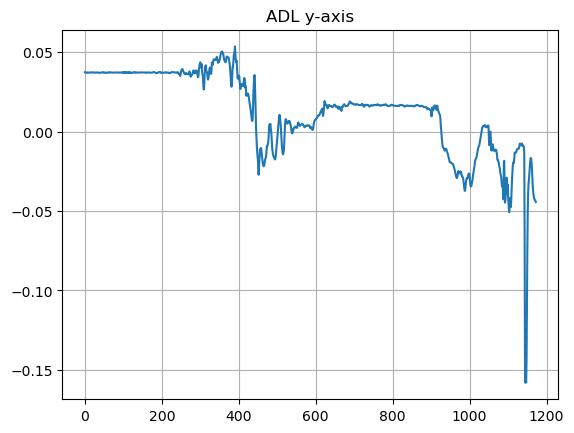

In [13]:
index = 335
plt.grid()
plt.plot(np.arange(len(y_axis_clean[index])), y_axis_clean[index])
plt.title("ADL y-axis")
plt.show()

In [14]:
z_axis_clean = preprocessing.normalize(z_axis)
z_axis_fall_clean = preprocessing.normalize(z_axis_fall)

In [15]:
z_jumps = sorted(abs((z_axis_clean[:,:-1] - z_axis_clean[:,1:]).flatten()), reverse=True)

In [16]:
to_remove_z = np.unique(np.where(abs(z_axis_clean[:,:-1] - z_axis_clean[:,1:]) >= 0.2)[0])
print(to_remove_z)
print(f"Therefore, we remove rows {to_remove_z} from our dataset")

[  3  54  78 141 142 152 159 170 171 172 176 207 208 209 266 267 268 297
 299 300 301 303 304 305 306 307 309 310 313 314 315 376 399 413 428 439
 442 514]
Therefore, we remove rows [  3  54  78 141 142 152 159 170 171 172 176 207 208 209 266 267 268 297
 299 300 301 303 304 305 306 307 309 310 313 314 315 376 399 413 428 439
 442 514] from our dataset


In [17]:
z_axis_clean = np.delete(z_axis_clean, to_remove_z, axis = 0)

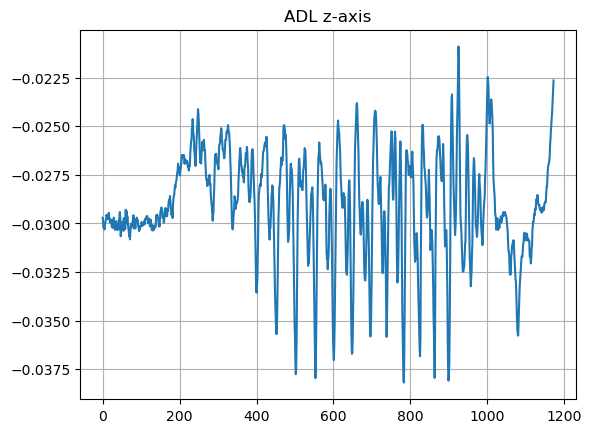

In [18]:
index = 2
plt.grid()
plt.plot(np.arange(len(z_axis_clean[index])), z_axis_clean[index])
plt.title("ADL z-axis")
plt.show()

In [19]:
ratio = 0.8

x_train_data = x_train_data_clean[:round(len(x_train_data_clean)*ratio)]
x_test_data = x_train_data_clean[round(len(x_train_data_clean)*ratio):]


y_train_data = y_axis_clean[:round(len(y_axis_clean)*ratio)]
y_test_data = y_axis_clean[round(len(y_axis_clean)*ratio):]

# Not done
z_train_data = z_axis_clean[:round(len(z_axis_clean)*ratio)]
z_test_data = z_axis_clean[round(len(z_axis_clean)*ratio):]

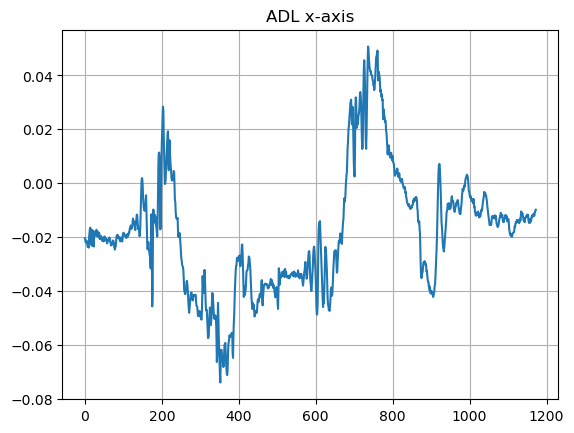

In [20]:
index = 306
plt.grid()
plt.plot(np.arange(len(x_train_data[index])), x_train_data[index])
plt.title("ADL x-axis")
plt.show()

### Building Autoencoder

In [21]:
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(500, activation = 'relu')
            #layers.Dense(1000, activation = 'relu'),
            #layers.Dense(900, activation = 'relu'),
            #layers.Dense(800, activation = 'relu')
        ])
        
        self.decoder = tf.keras.Sequential([
            #layers.Dense(900, activation = 'relu'),
            #layers.Dense(1000, activation = 'relu'),
            layers.Dense(1173, activation = 'sigmoid')
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
autoencoder_x = Autoencoder()
autoencoder_y = Autoencoder()
autoencoder_z = Autoencoder()

In [22]:
autoencoder_x.compile(optimizer = 'adam', loss = 'mae')
autoencoder_y.compile(optimizer = 'adam', loss = 'mae')
autoencoder_z.compile(optimizer = 'adam', loss = 'mae')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [23]:
history_x = autoencoder_x.fit(x_train_data, x_train_data,
                         epochs = 100000,
                         batch_size = 32,
                         validation_data = (x_test_data, x_test_data),
                         shuffle = True, callbacks = [early_stopping])

Epoch 1/100000
14/14 [==============================] - 1s 30ms/step - loss: 0.4734 - val_loss: 0.3811
Epoch 2/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.2362 - val_loss: 0.1121
Epoch 3/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0696 - val_loss: 0.0620
Epoch 4/100000
14/14 [==============================] - 0s 16ms/step - loss: 0.0425 - val_loss: 0.0500
Epoch 5/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0344 - val_loss: 0.0450
Epoch 6/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0306 - val_loss: 0.0418
Epoch 7/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0284 - val_loss: 0.0393
Epoch 8/100000
14/14 [==============================] - 0s 17ms/step - loss: 0.0270 - val_loss: 0.0373
Epoch 9/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0261 - val_loss: 0.0355
Epoch 10/100000
14/14 [==============================] - 0s 19ms/step - l

In [24]:
history_y = autoencoder_y.fit(y_train_data, y_train_data,
                         epochs = 100000,
                         batch_size = 32,
                         validation_data = (y_test_data, y_test_data),
                         shuffle = True, callbacks = [early_stopping])

Epoch 1/100000
14/14 [==============================] - 1s 27ms/step - loss: 0.4488 - val_loss: 0.3529
Epoch 2/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.1564 - val_loss: 0.0622
Epoch 3/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0349 - val_loss: 0.0345
Epoch 4/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0290 - val_loss: 0.0301
Epoch 5/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0273 - val_loss: 0.0286
Epoch 6/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0268 - val_loss: 0.0278
Epoch 7/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0264 - val_loss: 0.0273
Epoch 8/100000
14/14 [==============================] - 0s 19ms/step - loss: 0.0261 - val_loss: 0.0269
Epoch 9/100000
14/14 [==============================] - 0s 19ms/step - loss: 0.0256 - val_loss: 0.0263
Epoch 10/100000
14/14 [==============================] - 0s 16ms/step - l

Epoch 80/100000
14/14 [==============================] - 0s 21ms/step - loss: 0.0122 - val_loss: 0.0206
Epoch 81/100000
14/14 [==============================] - 0s 21ms/step - loss: 0.0121 - val_loss: 0.0205
Epoch 82/100000
14/14 [==============================] - 0s 21ms/step - loss: 0.0123 - val_loss: 0.0209
Epoch 83/100000
14/14 [==============================] - 0s 21ms/step - loss: 0.0122 - val_loss: 0.0206
Epoch 84/100000
14/14 [==============================] - 0s 21ms/step - loss: 0.0122 - val_loss: 0.0211
Epoch 85/100000
14/14 [==============================] - 0s 21ms/step - loss: 0.0126 - val_loss: 0.0205
Epoch 86/100000
14/14 [==============================] - 0s 21ms/step - loss: 0.0131 - val_loss: 0.0204
Epoch 87/100000
14/14 [==============================] - 0s 21ms/step - loss: 0.0126 - val_loss: 0.0210
Epoch 88/100000
14/14 [==============================] - 0s 21ms/step - loss: 0.0124 - val_loss: 0.0204
Epoch 89/100000
14/14 [==============================] - 0s 21ms

14/14 [==============================] - 0s 20ms/step - loss: 0.0111 - val_loss: 0.0200
Epoch 159/100000
14/14 [==============================] - 0s 20ms/step - loss: 0.0111 - val_loss: 0.0202
Epoch 160/100000
14/14 [==============================] - 0s 20ms/step - loss: 0.0110 - val_loss: 0.0201
Epoch 161/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0109 - val_loss: 0.0198
Epoch 162/100000
14/14 [==============================] - 0s 19ms/step - loss: 0.0112 - val_loss: 0.0199
Epoch 163/100000
14/14 [==============================] - 0s 19ms/step - loss: 0.0111 - val_loss: 0.0200
Epoch 164/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0112 - val_loss: 0.0203
Epoch 165/100000
14/14 [==============================] - 0s 18ms/step - loss: 0.0113 - val_loss: 0.0201
Epoch 166/100000
14/14 [==============================] - 0s 17ms/step - loss: 0.0110 - val_loss: 0.0203
Epoch 167/100000
14/14 [==============================] - 0s 19ms/step -

In [25]:
history_z = autoencoder_z.fit(z_train_data, z_train_data,
                         epochs = 100000,
                         batch_size = 32,
                         validation_data = (z_test_data, z_test_data),
                         shuffle = True, callbacks = [early_stopping])

Epoch 1/100000
13/13 [==============================] - 1s 26ms/step - loss: 0.4747 - val_loss: 0.4121
Epoch 2/100000
13/13 [==============================] - 0s 18ms/step - loss: 0.2888 - val_loss: 0.1368
Epoch 3/100000
13/13 [==============================] - 0s 19ms/step - loss: 0.1054 - val_loss: 0.0571
Epoch 4/100000
13/13 [==============================] - 0s 19ms/step - loss: 0.0598 - val_loss: 0.0413
Epoch 5/100000
13/13 [==============================] - 0s 18ms/step - loss: 0.0423 - val_loss: 0.0358
Epoch 6/100000
13/13 [==============================] - 0s 19ms/step - loss: 0.0341 - val_loss: 0.0327
Epoch 7/100000
13/13 [==============================] - 0s 19ms/step - loss: 0.0295 - val_loss: 0.0306
Epoch 8/100000
13/13 [==============================] - 0s 18ms/step - loss: 0.0271 - val_loss: 0.0290
Epoch 9/100000
13/13 [==============================] - 0s 19ms/step - loss: 0.0253 - val_loss: 0.0280
Epoch 10/100000
13/13 [==============================] - 0s 19ms/step - l

### Inspecting results

In [26]:
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

In [27]:
predicted_x = autoencoder_x.predict(x_train_data_clean)

17/17 [==============================] - 0s 3ms/step


In [28]:
predicted_x.shape

(535, 1173)

In [29]:
index = 0

0
MAE: 0.027124648913741112


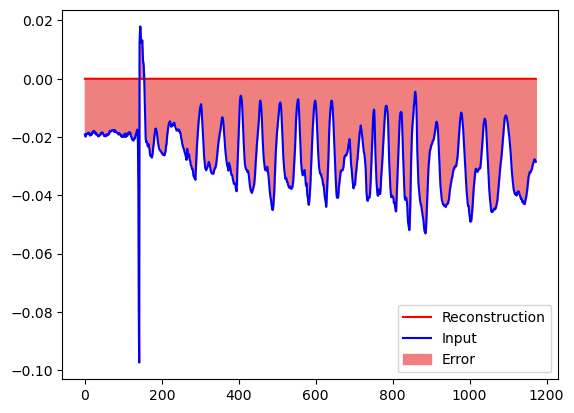

In [30]:
print(index)
print(f"MAE: {mae(predicted_x[index], x_train_data_clean[index])}")
plt.plot(predicted_x[index], 'r')
plt.plot(x_train_data_clean[index], 'b')

plt.fill_between(np.arange(1173), predicted_x[index], x_train_data_clean[index], color = 'lightcoral')
plt.legend(labels = ['Reconstruction', 'Input', 'Error'])
plt.show()
index += 1

In [31]:
predicted_y = autoencoder_y.predict(y_train_data)

14/14 [==============================] - 0s 3ms/step


In [32]:
index = 0

0
MAE: 0.0018348137382417917


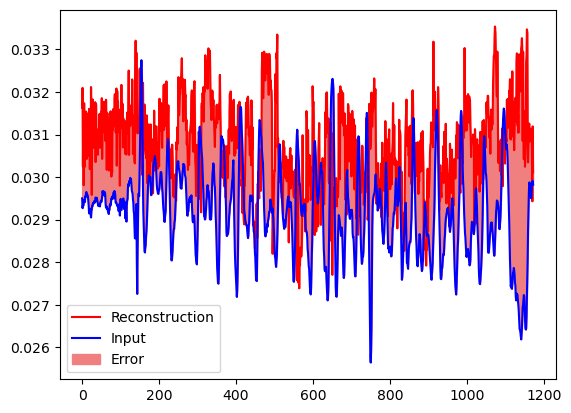

In [33]:
print(index)
print(f"MAE: {mae(predicted_y[index], y_train_data[index])}")
plt.plot(predicted_y[index], 'r')
plt.plot(y_train_data[index], 'b')

plt.fill_between(np.arange(1173), predicted_y[index], y_train_data[index], color = 'lightcoral')
plt.legend(labels = ['Reconstruction', 'Input', 'Error'])
plt.show()
index += 1

In [34]:
mae_scores = [mae(predicted_y[i], y_train_data[i]) for i in range(y_train_data.shape[0])]

In [35]:
sorted(mae_scores)

[0.000961633,
 0.0010434338,
 0.001053584,
 0.0010536298,
 0.0010547321,
 0.00105761,
 0.0010910358,
 0.0010966298,
 0.0011010204,
 0.0011014851,
 0.0011045845,
 0.0011064506,
 0.0011162884,
 0.0011186041,
 0.0011199813,
 0.0011217814,
 0.0011441553,
 0.0011448441,
 0.0011503656,
 0.0011517885,
 0.0011640927,
 0.0011715266,
 0.0011770382,
 0.0011909319,
 0.0011927207,
 0.0011966978,
 0.0012056067,
 0.0012447583,
 0.0012523404,
 0.0013109172,
 0.0013136046,
 0.0013199043,
 0.0013244756,
 0.0013286676,
 0.0013295318,
 0.001338389,
 0.0013503325,
 0.0013598525,
 0.0014385226,
 0.0014416033,
 0.0014489878,
 0.0014659432,
 0.0015276534,
 0.0015360909,
 0.0015426159,
 0.0015453646,
 0.0015532725,
 0.001555042,
 0.0015676754,
 0.0016085303,
 0.0016175093,
 0.0016188154,
 0.0016193087,
 0.0016541386,
 0.0016749951,
 0.0016999533,
 0.001722935,
 0.0017755881,
 0.0017844677,
 0.001805611,
 0.0018284195,
 0.00183374,
 0.0018348137,
 0.0018393784,
 0.0019450907,
 0.0020121662,
 0.0020299782,
 0.00

### Determining Threshold

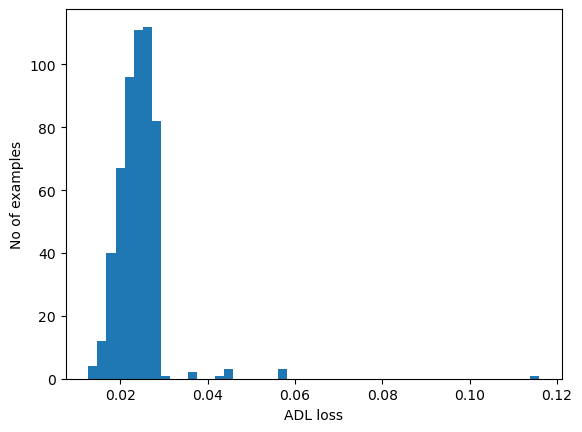

In [36]:
adl_loss_x = tf.keras.losses.mae(predicted_x, x_train_data_clean)
plt.hist(adl_loss_x[None,:], bins = 50)
plt.xlabel("ADL loss")
plt.ylabel("No of examples")
plt.show()

In [37]:
predicted_fall = autoencoder_x.predict(x_axis_fall_clean)

7/7 [==============================] - 0s 3ms/step


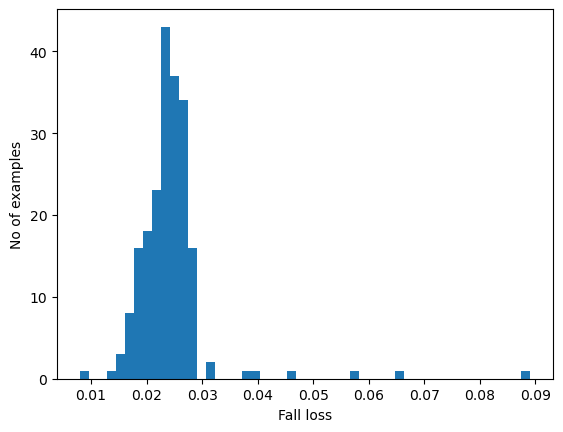

In [38]:
fall_loss_x = tf.keras.losses.mae(predicted_fall, x_axis_fall_clean)
plt.hist(fall_loss_x[None,:], bins = 50)
plt.xlabel("Fall loss")
plt.ylabel("No of examples")
plt.show()

In [39]:
threshold = np.mean(fall_loss_x) - np.std(fall_loss_x)
print(f"threshold: {threshold}")

threshold: 0.017117111012339592


In [40]:
def compute_evaluation(adl_loss, fall_loss, threshold):
    train_total = len(adl_loss)
    test_total = len(fall_loss)

    tp = np.count_nonzero(fall_loss > threshold) # right side of fall
    fp = np.count_nonzero(adl_loss > threshold) # right side of adl
    fn = np.count_nonzero(fall_loss <= threshold) # left side of fall
    tn = np.count_nonzero(adl_loss <= threshold) # left side of adl
    print(f'True Positives: {tp}')
    print(f'False Positives: {fp}')
    print(f'False Negatives: {fn}')
    print(f'True Negatives: {tn}')
    print()

    acc = accuracy(adl_loss, fall_loss, threshold)
    prec = precision(adl_loss, fall_loss, threshold)
    rec = recall(adl_loss, fall_loss, threshold)
    f1_score = f1(adl_loss, fall_loss, threshold)
    f1_weighted = weighted_f1(adl_loss, fall_loss, threshold) # prioritising precision
    print('------------------')
    print('Evalutaion Metrics')
    print('------------------')
    print(f'Accuracy: {round(acc,3)}')
    print(f'Precision: {round(prec,3)}')
    print(f'Recall: {round(rec,3)}')
    print(f'F1 Score: {round(f1_score,3)}')
    print(f'Weighted F1 Score: {round(f1_weighted,3)}')


def accuracy(adl_loss, fall_loss, threshold):
    tp = np.count_nonzero(fall_loss > threshold) # right side of fall
    fp = np.count_nonzero(adl_loss > threshold) # right side of adl
    fn = np.count_nonzero(fall_loss <= threshold) # left side of fall
    tn = np.count_nonzero(adl_loss <= threshold) # left side of adl
    return (tp+tn)/(tp+fp+fn+tn)

def precision(adl_loss, fall_loss, threshold):
    tp = np.count_nonzero(fall_loss > threshold) # right side of fall
    fp = np.count_nonzero(adl_loss > threshold) # right side of adl
    fn = np.count_nonzero(fall_loss <= threshold) # left side of fall
    tn = np.count_nonzero(adl_loss <= threshold) # left side of adl
    try:
        return tp/(tp+fp)
    except: return 0

def recall(adl_loss, fall_loss, threshold):
    tp = np.count_nonzero(fall_loss > threshold) # right side of fall
    fp = np.count_nonzero(adl_loss > threshold) # right side of adl
    fn = np.count_nonzero(fall_loss <= threshold) # left side of fall
    tn = np.count_nonzero(adl_loss <= threshold) # left side of adl
    try:
        return tp/(tp+fn)
    except: return 0

def f1(adl_loss, fall_loss, threshold):
    tp = np.count_nonzero(fall_loss > threshold) # right side of fall
    fp = np.count_nonzero(adl_loss > threshold) # right side of adl
    fn = np.count_nonzero(fall_loss <= threshold) # left side of fall
    tn = np.count_nonzero(adl_loss <= threshold) # left side of adl
    prec = precision(adl_loss, fall_loss, threshold)
    rec = recall(adl_loss, fall_loss, threshold)
    try:
        return 2*((prec*rec)/(prec+rec))
    except: return 0

def weighted_f1(adl_loss, fall_loss, threshold, beta=0.7):

    tp = np.count_nonzero(fall_loss > threshold) # right side of fall
    fp = np.count_nonzero(adl_loss > threshold) # right side of adl
    fn = np.count_nonzero(fall_loss <= threshold) # left side of fall
    tn = np.count_nonzero(adl_loss <= threshold) # left side of adl

    prec = precision(adl_loss, fall_loss, threshold)
    rec = recall(adl_loss, fall_loss, threshold)
    try:
        return (1+beta**2) * ((prec*rec)/(beta**2*prec+rec))
    except:
        return 0


    
compute_evaluation(adl_loss_x, fall_loss_x, threshold)

True Positives: 200
False Positives: 513
False Negatives: 8
True Negatives: 22

------------------
Evalutaion Metrics
------------------
Accuracy: 0.299
Precision: 0.281
Recall: 0.962
F1 Score: 0.434
Weighted F1 Score: 0.366


In [41]:
min_threshold = min(np.min(adl_loss_x), np.min(fall_loss_x))
max_threshold = max(np.max(adl_loss_x), np.max(fall_loss_x))
threshold_list = np.linspace(min_threshold, max_threshold, num = 100)

In [42]:
weighted_f1_score_list = [weighted_f1(adl_loss_x, fall_loss_x, threshold, beta = 0.5) for threshold in threshold_list]
precision_list = [precision(adl_loss_x, fall_loss_x, threshold) for threshold in threshold_list]
recall_list = [recall(adl_loss_x, fall_loss_x, threshold) for threshold in threshold_list]

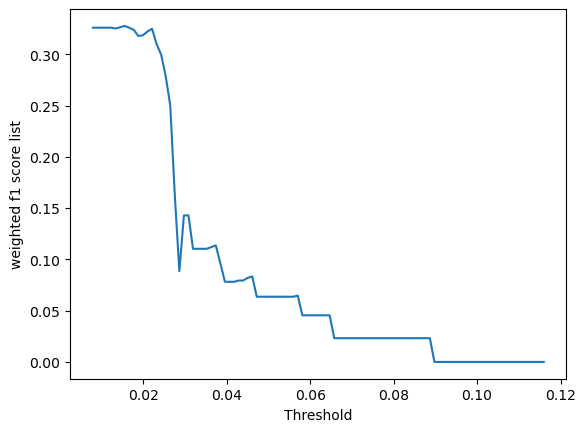

In [43]:
plt.plot(threshold_list, weighted_f1_score_list)
plt.xlabel("Threshold")
plt.ylabel("weighted f1 score list")
plt.show()

In [44]:
index = np.argmax(weighted_f1_score_list)
print(f"Highest Weighted F1 Score: {weighted_f1_score_list[index]}")
print(f"Best Threshold: {threshold_list[index]}")

Highest Weighted F1 Score: 0.3276081424936386
Best Threshold: 0.015560183297805112


In [45]:
accuracy(adl_loss_x, fall_loss_x, threshold_list[index])

0.28667563930013457

In [46]:
precision(adl_loss_x, fall_loss_x, threshold_list[index])

0.28065395095367845

In [47]:
recall(adl_loss_x, fall_loss_x, threshold_list[index])

0.9903846153846154

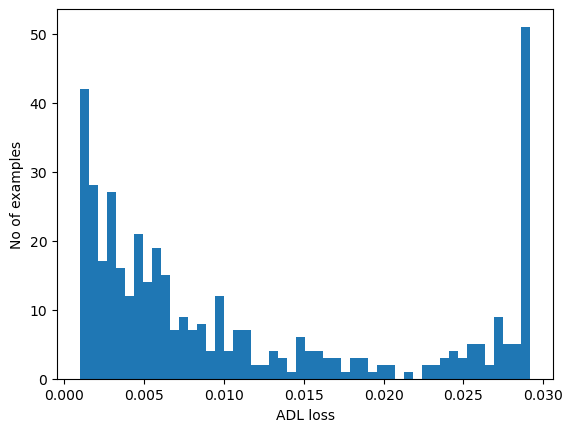

In [48]:
adl_loss_y = tf.keras.losses.mae(predicted_y, y_train_data)
plt.hist(adl_loss_y[None,:], bins = 50)
plt.xlabel("ADL loss")
plt.ylabel("No of examples")
plt.show()

In [49]:
predicted_fall = autoencoder_y.predict(y_axis_fall_clean)

7/7 [==============================] - 0s 3ms/step


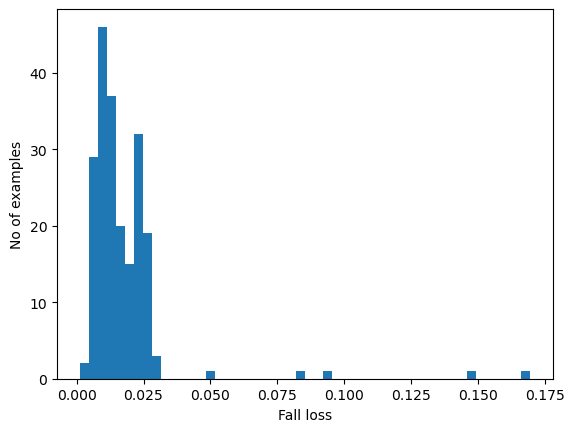

In [50]:
fall_loss_y = tf.keras.losses.mae(predicted_fall, y_axis_fall_clean)
plt.hist(fall_loss_y[None,:], bins = 50)
plt.xlabel("Fall loss")
plt.ylabel("No of examples")
plt.show()

In [51]:
threshold = np.mean(fall_loss_y) - np.std(fall_loss_y)
print(f"threshold: {threshold}")

threshold: -1.1079013347625732e-05


In [52]:
min_threshold = min(np.min(adl_loss_y), np.min(fall_loss_y))
max_threshold = max(np.max(adl_loss_y), np.max(fall_loss_y))
threshold_list = np.linspace(min_threshold, max_threshold, num = 100)

In [53]:
weighted_f1_score_list = [weighted_f1(adl_loss_y, fall_loss_y, threshold, beta = 0.5) for threshold in threshold_list]
precision_list = [precision(adl_loss_y, fall_loss_y, threshold) for threshold in threshold_list]
recall_list = [recall(adl_loss_y, fall_loss_y, threshold) for threshold in threshold_list]

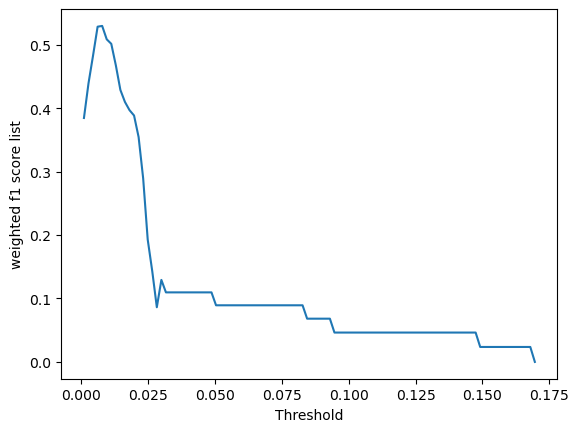

In [54]:
plt.plot(threshold_list, weighted_f1_score_list)
plt.xlabel("Threshold")
plt.ylabel("weighted f1 score list")
plt.show()

In [55]:
index = np.argmax(weighted_f1_score_list)
print(f"Highest Weighted F1 Score: {weighted_f1_score_list[index]}")
print(f"Best Threshold: {threshold_list[index]}")

Highest Weighted F1 Score: 0.5297619047619048
Best Threshold: 0.0077747092305946


# ANN Approach

In [56]:
x_adl = x_train_data_clean
x_fall = x_axis_fall_clean

y_adl = y_axis_clean
y_fall = y_axis_fall_clean

z_adl = z_axis_clean
z_fall = z_axis_fall_clean

In [57]:
x_data = np.concatenate([x_adl, x_fall])
y_data = np.concatenate([y_adl, y_fall])
z_data = np.concatenate([z_adl, z_fall])

print(f"""
x_data: {x_data.shape[0]}
y_data: {y_data.shape[0]}
z_data: {z_data.shape[0]}
""")


x_data: 743
y_data: 729
z_data: 708



In [58]:
x_labels = np.concatenate([np.zeros((x_adl.shape[0], 1)), np.ones((x_fall.shape[0], 1))], axis = 0)
y_labels = np.concatenate([np.zeros((y_adl.shape[0], 1)), np.ones((y_fall.shape[0], 1))], axis = 0)
z_labels = np.concatenate([np.zeros((z_adl.shape[0], 1)), np.ones((z_fall.shape[0], 1))], axis = 0)

In [59]:
test_percent = 0.2
np.random.seed(100)
x_test_ind = sorted(np.random.choice(range(x_data.shape[0]), replace = False, size = round(x_data.shape[0] * test_percent)))
y_test_ind = sorted(np.random.choice(range(y_data.shape[0]), replace = False, size = round(y_data.shape[0] * test_percent)))
z_test_ind = sorted(np.random.choice(range(z_data.shape[0]), replace = False, size = round(z_data.shape[0] * test_percent)))
x_train_ind = np.delete(np.arange(0, x_data.shape[0]), x_test_ind)
y_train_ind = np.delete(np.arange(0, y_data.shape[0]), y_test_ind)
z_train_ind = np.delete(np.arange(0, z_data.shape[0]), z_test_ind)

In [60]:
x_train_data = x_data[x_train_ind, :]
y_train_data = y_data[y_train_ind, :]
z_train_data = z_data[z_train_ind, :]

x_train_labels = x_labels[x_train_ind, :]
y_train_labels = y_labels[y_train_ind, :]
z_train_labels = z_labels[z_train_ind, :]

x_test_data = x_data[x_test_ind, :]
y_test_data = y_data[y_test_ind, :]
z_test_data = z_data[z_test_ind, :]

x_test_labels = x_labels[x_test_ind, :]
y_test_labels = y_labels[y_test_ind, :]
z_test_labels = z_labels[z_test_ind, :]

In [61]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x_train_labels)

x_train_labels = enc.transform(x_train_labels).toarray()
x_test_labels = enc.transform(x_test_labels).toarray()

y_train_labels = enc.transform(y_train_labels).toarray()
y_test_labels = enc.transform(y_test_labels).toarray()

z_train_labels = enc.transform(z_train_labels).toarray()
z_test_labels = enc.transform(z_test_labels).toarray()

In [62]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

In [63]:
model_x = tf.keras.Sequential([
    layers.Dense(400, activation = 'relu'),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(2, activation = 'sigmoid')
])

model_y = tf.keras.Sequential([
    layers.Dense(400, activation = 'relu'),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(2, activation = 'sigmoid')
])

model_z = tf.keras.Sequential([
    layers.Dense(400, activation = 'relu'),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(2, activation = 'sigmoid')
])

model_x.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_y.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_z.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [64]:
history_x = model_x.fit(x_train_data, x_train_labels,
                    validation_data = (x_test_data, x_test_labels),
                    epochs = 100,
                    callbacks = [early_stopping],
                    shuffle = True)

Epoch 1/100
19/19 [==============================] - 1s 20ms/step - loss: 0.5993 - accuracy: 0.7054 - val_loss: 0.4949 - val_accuracy: 0.7517
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.4715 - accuracy: 0.7525 - val_loss: 0.3984 - val_accuracy: 0.8523
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3909 - accuracy: 0.8350 - val_loss: 0.4020 - val_accuracy: 0.8054
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3458 - accuracy: 0.8485 - val_loss: 0.4035 - val_accuracy: 0.7919
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3129 - accuracy: 0.8620 - val_loss: 0.4197 - val_accuracy: 0.7987
Epoch 6/100
19/19 [==============================] - 0s 11ms/step - loss: 0.2756 - accuracy: 0.8822 - val_loss: 0.4440 - val_accuracy: 0.8121
Epoch 7/100
19/19 [==============================] - 0s 11ms/step - loss: 0.2945 - accuracy: 0.8754 - val_loss: 0.4524 - val_accuracy: 0.8322


In [65]:
history_y = model_y.fit(y_train_data, y_train_labels,
                    validation_data = (y_test_data, y_test_labels),
                    epochs = 100,
                    callbacks = [early_stopping],
                    shuffle = True)

Epoch 1/100
19/19 [==============================] - 1s 20ms/step - loss: 0.4946 - accuracy: 0.7925 - val_loss: 0.3563 - val_accuracy: 0.8425
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3509 - accuracy: 0.8439 - val_loss: 0.3222 - val_accuracy: 0.8767
Epoch 3/100
19/19 [==============================] - 0s 11ms/step - loss: 0.3133 - accuracy: 0.8576 - val_loss: 0.2724 - val_accuracy: 0.8767
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 0.2657 - accuracy: 0.8851 - val_loss: 0.2767 - val_accuracy: 0.8630
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 0.2608 - accuracy: 0.8834 - val_loss: 0.2290 - val_accuracy: 0.8699
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 0.2362 - accuracy: 0.8954 - val_loss: 0.2068 - val_accuracy: 0.9178
Epoch 7/100
19/19 [==============================] - 0s 11ms/step - loss: 0.2086 - accuracy: 0.9194 - val_loss: 0.2120 - val_accuracy: 0.8973
Epoch 

In [66]:
history_z = model_z.fit(z_train_data, z_train_labels,
                    validation_data = (z_test_data, z_test_labels),
                    epochs = 100,
                    callbacks = [early_stopping],
                    shuffle = True)

Epoch 1/100
18/18 [==============================] - 2s 20ms/step - loss: 0.6141 - accuracy: 0.6767 - val_loss: 0.5121 - val_accuracy: 0.7254
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: 0.5005 - accuracy: 0.7208 - val_loss: 0.4531 - val_accuracy: 0.7535
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 0.4392 - accuracy: 0.7633 - val_loss: 0.3719 - val_accuracy: 0.8239
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 0.3857 - accuracy: 0.8304 - val_loss: 0.3494 - val_accuracy: 0.8592
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 0.3563 - accuracy: 0.8180 - val_loss: 0.3346 - val_accuracy: 0.8873
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 0.3085 - accuracy: 0.8551 - val_loss: 0.3627 - val_accuracy: 0.8099
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 0.3376 - accuracy: 0.8322 - val_loss: 0.3134 - val_accuracy: 0.8592
Epoch 

5/5 [==============================] - 0s 2ms/step


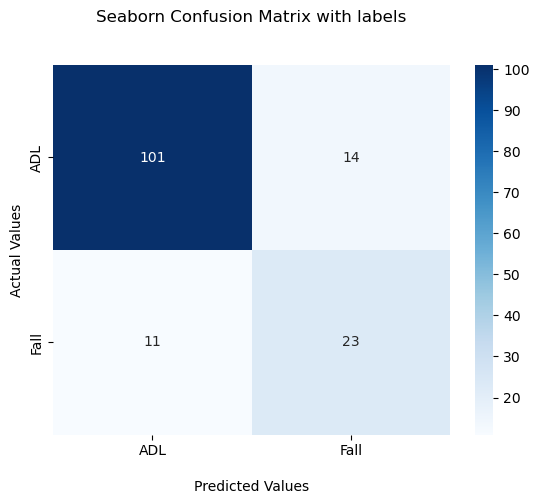

In [67]:
predicted_x = model_x.predict(x_test_data)
predicted_x = [np.argmax(i) for i in predicted_x]
actual_x = [np.argmax(i) for i in x_test_labels]

cf_matrix = confusion_matrix(predicted_x, actual_x)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

5/5 [==============================] - 0s 3ms/step


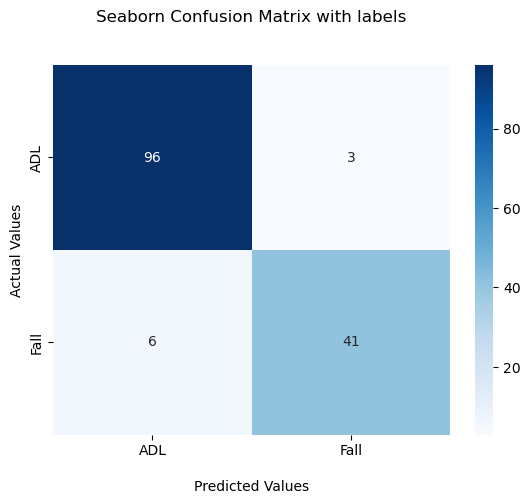

In [68]:
predicted_y = model_y.predict(y_test_data)
predicted_y = [np.argmax(i) for i in predicted_y]
actual_y = [np.argmax(i) for i in y_test_labels]

cf_matrix = confusion_matrix(predicted_y, actual_y)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

5/5 [==============================] - 0s 4ms/step


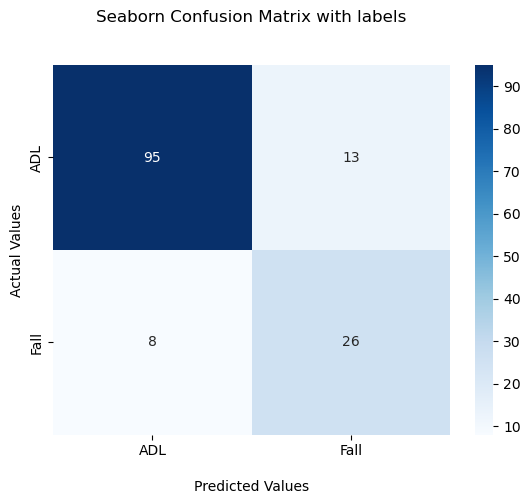

In [69]:
predicted_z = model_z.predict(z_test_data)
predicted_z = [np.argmax(i) for i in predicted_z]
actual_z = [np.argmax(i) for i in z_test_labels]

cf_matrix = confusion_matrix(predicted_z, actual_z)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

# 1D CNN Approach

In [70]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

In [71]:
cnn_model_x = tf.keras.Sequential([
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    Dropout(0.5),
    MaxPooling1D(pool_size = 2),
    Flatten(),
    layers.Dense(400, activation = 'relu'),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(2, activation = 'sigmoid')
])

cnn_model_x.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
x_train_data_reshaped = x_train_data[..., None]
x_test_data_reshaped = x_test_data[..., None]

In [73]:
history_x = cnn_model_x.fit(x_train_data_reshaped, x_train_labels,
                    validation_data = (x_test_data_reshaped, x_test_labels),
                    epochs = 100,
                    callbacks = [early_stopping],
                    shuffle = True)

Epoch 1/100
19/19 [==============================] - 6s 222ms/step - loss: 0.6517 - accuracy: 0.7155 - val_loss: 0.5569 - val_accuracy: 0.7517
Epoch 2/100
19/19 [==============================] - 4s 202ms/step - loss: 0.5908 - accuracy: 0.7121 - val_loss: 0.5565 - val_accuracy: 0.7517
Epoch 3/100
19/19 [==============================] - 4s 206ms/step - loss: 0.5251 - accuracy: 0.7121 - val_loss: 0.4710 - val_accuracy: 0.7517
Epoch 4/100
19/19 [==============================] - 4s 206ms/step - loss: 0.4605 - accuracy: 0.7980 - val_loss: 0.4363 - val_accuracy: 0.8188
Epoch 5/100
19/19 [==============================] - 4s 203ms/step - loss: 0.4073 - accuracy: 0.8232 - val_loss: 0.4012 - val_accuracy: 0.8255
Epoch 6/100
19/19 [==============================] - 4s 206ms/step - loss: 0.3491 - accuracy: 0.8451 - val_loss: 0.3969 - val_accuracy: 0.8322
Epoch 7/100
19/19 [==============================] - 4s 207ms/step - loss: 0.3503 - accuracy: 0.8569 - val_loss: 0.3868 - val_accuracy: 0.8658

5/5 [==============================] - 0s 22ms/step


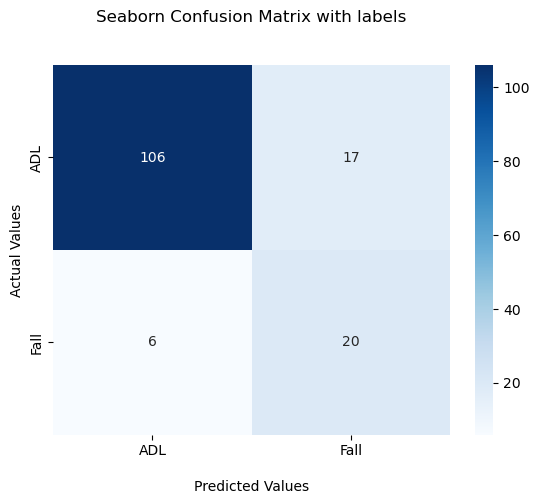

In [74]:
predicted_x = cnn_model_x.predict(x_test_data)
predicted_x = [np.argmax(i) for i in predicted_x]
actual_x = [np.argmax(i) for i in x_test_labels]

cf_matrix = confusion_matrix(predicted_x, actual_x)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [75]:
cnn_model_y = tf.keras.Sequential([
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    Dropout(0.5),
    MaxPooling1D(pool_size = 2),
    Flatten(),
    layers.Dense(400, activation = 'relu'),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(2, activation = 'sigmoid')
])

cnn_model_y.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
y_train_data_reshaped = y_train_data[..., None]
y_test_data_reshaped = y_test_data[..., None]

In [77]:
history_y = cnn_model_y.fit(y_train_data_reshaped, y_train_labels,
                    validation_data = (y_test_data_reshaped, y_test_labels),
                    epochs = 100,
                    callbacks = [early_stopping],
                    shuffle = True)

Epoch 1/100
19/19 [==============================] - 6s 221ms/step - loss: 0.5908 - accuracy: 0.6947 - val_loss: 0.4873 - val_accuracy: 0.7740
Epoch 2/100
19/19 [==============================] - 4s 204ms/step - loss: 0.3591 - accuracy: 0.8302 - val_loss: 0.3272 - val_accuracy: 0.8699
Epoch 3/100
19/19 [==============================] - 4s 204ms/step - loss: 0.3344 - accuracy: 0.8679 - val_loss: 0.3149 - val_accuracy: 0.8904
Epoch 4/100
19/19 [==============================] - 4s 208ms/step - loss: 0.2828 - accuracy: 0.8748 - val_loss: 0.2485 - val_accuracy: 0.9178
Epoch 5/100
19/19 [==============================] - 4s 203ms/step - loss: 0.2822 - accuracy: 0.8937 - val_loss: 0.2505 - val_accuracy: 0.8973
Epoch 6/100
19/19 [==============================] - 4s 205ms/step - loss: 0.2308 - accuracy: 0.9057 - val_loss: 0.2643 - val_accuracy: 0.8973
Epoch 7/100
19/19 [==============================] - 4s 204ms/step - loss: 0.1854 - accuracy: 0.9280 - val_loss: 0.2117 - val_accuracy: 0.9178

5/5 [==============================] - 0s 23ms/step


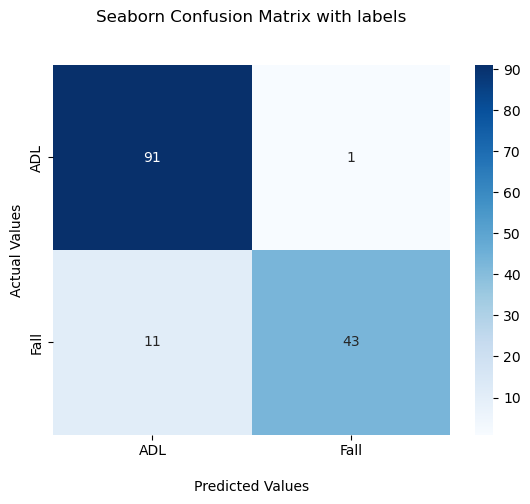

In [78]:
predicted_y = cnn_model_y.predict(y_test_data)
predicted_y = [np.argmax(i) for i in predicted_y]
actual_y = [np.argmax(i) for i in y_test_labels]

cf_matrix = confusion_matrix(predicted_y, actual_y)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [79]:
cnn_model_z = tf.keras.Sequential([
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    Dropout(0.5),
    MaxPooling1D(pool_size = 2),
    Flatten(),
    layers.Dense(400, activation = 'relu'),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(2, activation = 'sigmoid')
])

cnn_model_z.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
z_train_data_reshaped = z_train_data[..., None]
z_test_data_reshaped = z_test_data[..., None]

In [81]:
history_z = cnn_model_z.fit(z_train_data_reshaped, z_train_labels,
                    validation_data = (z_test_data_reshaped, z_test_labels),
                    epochs = 100,
                    callbacks = [early_stopping],
                    shuffle = True)

Epoch 1/100
18/18 [==============================] - 6s 228ms/step - loss: 0.6262 - accuracy: 0.7032 - val_loss: 0.5577 - val_accuracy: 0.7254
Epoch 2/100
18/18 [==============================] - 4s 204ms/step - loss: 0.5575 - accuracy: 0.7014 - val_loss: 0.4655 - val_accuracy: 0.7254
Epoch 3/100
18/18 [==============================] - 4s 204ms/step - loss: 0.5245 - accuracy: 0.7014 - val_loss: 0.4558 - val_accuracy: 0.7113
Epoch 4/100
18/18 [==============================] - 4s 206ms/step - loss: 0.4619 - accuracy: 0.7668 - val_loss: 0.4413 - val_accuracy: 0.8099
Epoch 5/100
18/18 [==============================] - 4s 207ms/step - loss: 0.4003 - accuracy: 0.8110 - val_loss: 0.3881 - val_accuracy: 0.8380
Epoch 6/100
18/18 [==============================] - 4s 209ms/step - loss: 0.3666 - accuracy: 0.8269 - val_loss: 0.3637 - val_accuracy: 0.8028
Epoch 7/100
18/18 [==============================] - 4s 207ms/step - loss: 0.3109 - accuracy: 0.8498 - val_loss: 0.3560 - val_accuracy: 0.8380

5/5 [==============================] - 0s 22ms/step


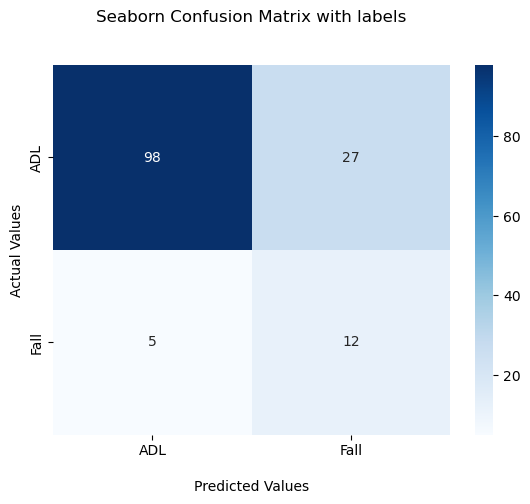

In [82]:
predicted_z = cnn_model_z.predict(z_test_data)
predicted_z = [np.argmax(i) for i in predicted_z]
actual_z = [np.argmax(i) for i in z_test_labels]

cf_matrix = confusion_matrix(predicted_z, actual_z)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

### 1D-CNN with Maximum Voting

In [83]:
to_remove = sorted(np.unique(np.concatenate(([304,305,306],
[299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315],
[3,  54,  78, 141, 142, 152, 159, 170, 171, 172, 176, 207, 208, 209, 266, 267, 268, 297,
 299, 300, 301, 303, 304, 305, 306, 307, 309, 310, 313, 314, 315, 376, 399, 413, 428, 439,
 442, 514,]))))
to_keep = np.delete(np.arange(0,len(x_axis)), to_remove)

In [84]:
x_adl = x_axis[to_keep]
y_adl = y_axis[to_keep]
z_adl = z_axis[to_keep]
x_data = np.concatenate([x_adl, x_fall])
x_data = np.concatenate([x_adl, x_fall])
x_data = np.concatenate([x_adl, x_fall])

x_labels = np.concatenate([np.zeros((len(x_adl),)), np.ones((len(x_fall),))])
y_labels = np.concatenate([np.zeros((len(x_adl),)), np.ones((len(x_fall),))])
z_labels = np.concatenate([np.zeros((len(x_adl),)), np.ones((len(x_fall),))])

x_labels = x_labels.reshape(-1, 1)
y_labels = y_labels.reshape(-1, 1)
z_labels = z_labels.reshape(-1, 1)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x_labels)

x_labels = enc.transform(x_labels).toarray()
y_labels = enc.transform(y_labels).toarray()
z_labels = enc.transform(z_labels).toarray()

In [85]:
test_percent = 0.2
np.random.seed(100)
test_ind =  sorted(np.random.choice(range(x_data.shape[0]), replace = False, size = round(x_data.shape[0] * test_percent)))
train_ind = np.delete(np.arange(0, x_data.shape[0]), test_ind)

In [86]:
x_train_data = x_data[train_ind, :]
y_train_data = y_data[train_ind, :]
z_train_data = z_data[train_ind, :]

x_train_labels = x_labels[train_ind, :]
y_train_labels = y_labels[train_ind, :]
z_train_labels = z_labels[train_ind, :]

x_test_data = x_data[test_ind, :]
y_test_data = y_data[test_ind, :]
z_test_data = z_data[test_ind, :]

x_test_labels = x_labels[test_ind, :]
y_test_labels = y_labels[test_ind, :]
z_test_labels = z_labels[test_ind, :]

In [87]:
cnn_model_x = tf.keras.Sequential([
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    Dropout(0.5),
    MaxPooling1D(pool_size = 2),
    Flatten(),
    layers.Dense(400, activation = 'relu'),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(2, activation = 'sigmoid')
])

cnn_model_x.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
x_train_data_reshaped = x_train_data[..., None]
x_test_data_reshaped = x_test_data[..., None]

In [89]:
history_x = cnn_model_x.fit(x_train_data_reshaped, x_train_labels,
                    validation_data = (x_test_data_reshaped, x_test_labels),
                    epochs = 100,
                    callbacks = [early_stopping],
                    shuffle = True)

Epoch 1/100
18/18 [==============================] - 6s 221ms/step - loss: 0.2596 - accuracy: 0.8792 - val_loss: 0.1039 - val_accuracy: 0.9787
Epoch 2/100
18/18 [==============================] - 4s 199ms/step - loss: 0.1072 - accuracy: 0.9574 - val_loss: 0.0731 - val_accuracy: 0.9787
Epoch 3/100
18/18 [==============================] - 4s 201ms/step - loss: 0.0273 - accuracy: 0.9947 - val_loss: 0.0514 - val_accuracy: 0.9858
Epoch 4/100
18/18 [==============================] - 4s 199ms/step - loss: 0.0419 - accuracy: 0.9876 - val_loss: 0.0753 - val_accuracy: 0.9787
Epoch 5/100
18/18 [==============================] - 4s 198ms/step - loss: 0.0614 - accuracy: 0.9858 - val_loss: 0.0914 - val_accuracy: 0.9645
Epoch 6/100
18/18 [==============================] - 4s 201ms/step - loss: 0.0442 - accuracy: 0.9893 - val_loss: 0.0650 - val_accuracy: 0.9787


5/5 [==============================] - 0s 20ms/step


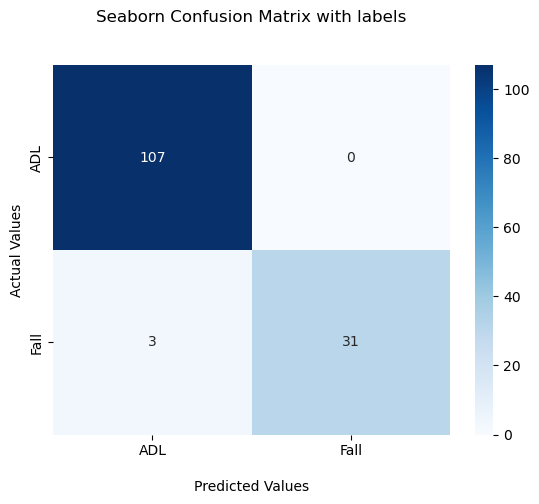

In [90]:
predicted_x = cnn_model_x.predict(x_test_data)
predicted_x = [np.argmax(i) for i in predicted_x]
actual_x = [np.argmax(i) for i in x_test_labels]

cf_matrix = confusion_matrix(predicted_x, actual_x)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [91]:
cnn_model_y = tf.keras.Sequential([
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    Dropout(0.5),
    MaxPooling1D(pool_size = 2),
    Flatten(),
    layers.Dense(400, activation = 'relu'),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(2, activation = 'sigmoid')
])

cnn_model_y.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
y_train_data_reshaped = y_train_data[..., None]
y_test_data_reshaped = y_test_data[..., None]

In [93]:
history_y = cnn_model_y.fit(y_train_data_reshaped, y_train_labels,
                    validation_data = (y_test_data_reshaped, y_test_labels),
                    epochs = 100,
                    callbacks = [early_stopping],
                    shuffle = True)

Epoch 1/100
18/18 [==============================] - 5s 213ms/step - loss: 0.5014 - accuracy: 0.7513 - val_loss: 0.4110 - val_accuracy: 0.8156
Epoch 2/100
18/18 [==============================] - 4s 201ms/step - loss: 0.4014 - accuracy: 0.8384 - val_loss: 0.3838 - val_accuracy: 0.8298
Epoch 3/100
18/18 [==============================] - 4s 205ms/step - loss: 0.3609 - accuracy: 0.8561 - val_loss: 0.4336 - val_accuracy: 0.8227
Epoch 4/100
18/18 [==============================] - 4s 201ms/step - loss: 0.3593 - accuracy: 0.8508 - val_loss: 0.3304 - val_accuracy: 0.8440
Epoch 5/100
18/18 [==============================] - 4s 206ms/step - loss: 0.3383 - accuracy: 0.8632 - val_loss: 0.3522 - val_accuracy: 0.8582
Epoch 6/100
18/18 [==============================] - 4s 202ms/step - loss: 0.3329 - accuracy: 0.8828 - val_loss: 0.3394 - val_accuracy: 0.8723
Epoch 7/100
18/18 [==============================] - 4s 202ms/step - loss: 0.3227 - accuracy: 0.8774 - val_loss: 0.3582 - val_accuracy: 0.8511

5/5 [==============================] - 0s 22ms/step


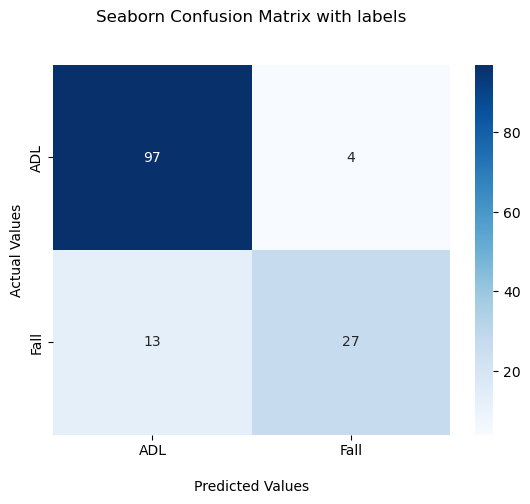

In [94]:
predicted_y = cnn_model_y.predict(y_test_data)
predicted_y = [np.argmax(i) for i in predicted_y]
actual_y = [np.argmax(i) for i in y_test_labels]

cf_matrix = confusion_matrix(predicted_y, actual_y)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [95]:
cnn_model_z = tf.keras.Sequential([
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    Dropout(0.5),
    MaxPooling1D(pool_size = 2),
    Flatten(),
    layers.Dense(400, activation = 'relu'),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(2, activation = 'sigmoid')
])

cnn_model_z.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
z_train_data_reshaped = z_train_data[..., None]
z_test_data_reshaped = z_test_data[..., None]

In [97]:
history_z = cnn_model_z.fit(z_train_data_reshaped, z_train_labels,
                    validation_data = (z_test_data_reshaped, z_test_labels),
                    epochs = 100,
                    callbacks = [early_stopping],
                    shuffle = True)

Epoch 1/100
18/18 [==============================] - 6s 218ms/step - loss: 0.6030 - accuracy: 0.6519 - val_loss: 0.4818 - val_accuracy: 0.7801
Epoch 2/100
18/18 [==============================] - 4s 205ms/step - loss: 0.4990 - accuracy: 0.7442 - val_loss: 0.4413 - val_accuracy: 0.8156
Epoch 3/100
18/18 [==============================] - 4s 205ms/step - loss: 0.4270 - accuracy: 0.8011 - val_loss: 0.3731 - val_accuracy: 0.8085
Epoch 4/100
18/18 [==============================] - 4s 208ms/step - loss: 0.3887 - accuracy: 0.8171 - val_loss: 0.3605 - val_accuracy: 0.7943
Epoch 5/100
18/18 [==============================] - 4s 206ms/step - loss: 0.3267 - accuracy: 0.8490 - val_loss: 0.3880 - val_accuracy: 0.8014


5/5 [==============================] - 0s 22ms/step


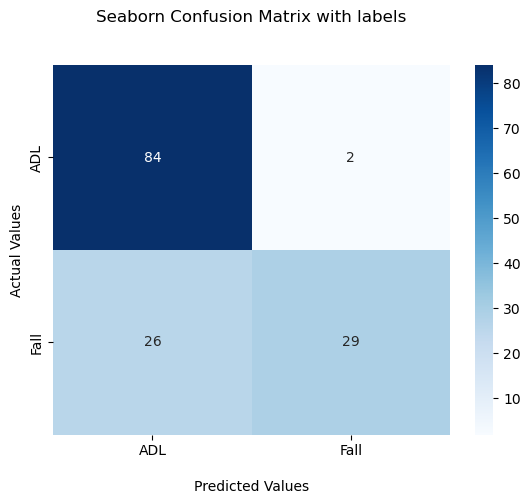

In [98]:
predicted_z = cnn_model_z.predict(z_test_data)
predicted_z = [np.argmax(i) for i in predicted_z]
actual_z = [np.argmax(i) for i in z_test_labels]

cf_matrix = confusion_matrix(predicted_z, actual_z)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

5/5 [==============================] - 0s 22ms/step


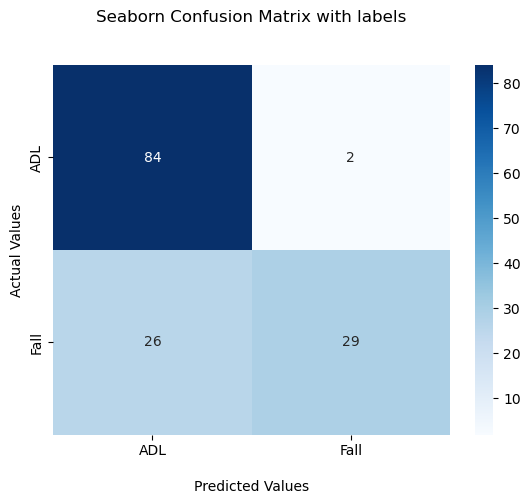

In [99]:
# Getting maximum votes
predicted_z = cnn_model_z.predict(z_test_data)
predicted_z = [np.argmax(i) for i in predicted_z]
actual_z = [np.argmax(i) for i in z_test_labels]

cf_matrix = confusion_matrix(predicted_z, actual_z)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [103]:
predicted = (np.array(predicted_x) + np.array(predicted_y) + np.array(predicted_z)) >= 2
actual = [np.argmax(i) for i in x_test_labels]

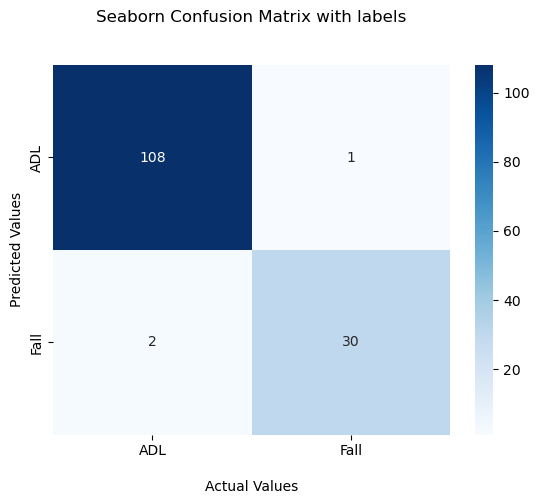

In [104]:
# Getting maximum votes
cf_matrix = confusion_matrix(predicted, actual)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [111]:
count = 0
for i in range(len(predicted)):
    if predicted[i] == 1 and actual[i] == 0:
        count += 1
count

2

In [116]:
# cnn_model_x.save("cnn_model_x_axis_UMAFall")
# cnn_model_y.save("cnn_model_y_axis_UMAFall")
# cnn_model_z.save("cnn_model_z_axis_UMAFall")


INFO:tensorflow:Assets written to: cnn_model_x_axis_UMAFall\assets


INFO:tensorflow:Assets written to: cnn_model_x_axis_UMAFall\assets


INFO:tensorflow:Assets written to: cnn_model_y_axis_UMAFall\assets


INFO:tensorflow:Assets written to: cnn_model_y_axis_UMAFall\assets


INFO:tensorflow:Assets written to: cnn_model_z_axis_UMAFall\assets


INFO:tensorflow:Assets written to: cnn_model_z_axis_UMAFall\assets
